In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Display numbers in 2 decimal places
# Source: https://stackoverflow.com/questions/658763/how-to-suppress-scientific-notation-when-printing-float-values
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Load Preprocessed Dataset
df = pd.read_csv('/content/drive/MyDrive/Research - Summer 2024/ridership_with_weather_dataset_preprocessed.csv')
df.head()

,Station Id,Check-Outs,Check-Ins,Year,Month,Day,Hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),...,Wind Spd (km/h),Visibility (km),Stn Press (kPa),Smoke,Rain-related,Snow-related,Clear/Cloudy,Obstructive,Freezing,Extreme
0,7000,0,1,2019,1,1,1,4.40,3.60,94.00,...,7.00,9.70,97.32,0,0,0,0,1,0,0
1,7000,0,2,2019,1,1,2,2.40,1.50,94.00,...,35.00,9.70,97.54,0,1,0,0,1,0,0
2,7000,2,0,2019,1,1,7,1.30,-1.00,84.00,...,27.00,24.10,99.04,0,0,0,1,0,0,0
3,7000,3,0,2019,1,1,11,-1.00,-5.00,75.00,...,28.00,24.10,99.77,0,0,0,1,0,0,0
4,7000,4,0,2019,1,1,15,-1.70,-7.30,66.00,...,25.00,24.10,100.10,0,0,0,1,0,0,0


# EDA on Full Dataset

In [ ]:
len(df)

7866544

In [ ]:
# Number of unique stations
len(df["Station Id"].unique())

626

In [ ]:
df.columns

Index(['Station Id', 'Check-Outs', 'Check-Ins', 'Year', 'Month', 'Day', 'Hour',
       'Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Smoke',
       'Rain-related', 'Snow-related', 'Clear/Cloudy', 'Obstructive',
       'Freezing', 'Extreme'],
      dtype='object')

In [ ]:
# Find number of rows per "Station Id"
df["Station Id"].value_counts()

,count
Station Id,
7006,26433
7033,26134
7121,25975
7100,25903
7076,25621
...,...
7638,35
7219,13
7218,6


In [ ]:
# Print top 15 most numerous rows in "Station Id"
df["Station Id"].value_counts().head(15)

,count
Station Id,
7006,26433
7033,26134
7121,25975
7100,25903
7076,25621
7022,25574
7030,25380
7007,25312
7044,25176


In [ ]:
df.describe()

,Station Id,Check-Outs,Check-Ins,Year,Month,Day,Hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),...,Wind Spd (km/h),Visibility (km),Stn Press (kPa),Smoke,Rain-related,Snow-related,Clear/Cloudy,Obstructive,Freezing,Extreme
count,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,...,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00,7866544.00
mean,7268.82,1.85,1.85,2021.49,6.94,15.70,13.62,13.72,6.55,64.58,...,16.52,22.66,99.51,0.00,0.07,0.03,0.87,0.05,0.00,0.00
std,185.08,2.45,2.58,1.39,2.98,8.75,5.78,9.91,9.24,18.28,...,8.71,4.36,0.70,0.05,0.26,0.16,0.34,0.21,0.04,0.07
min,7000.00,0.00,0.00,2019.00,1.00,1.00,0.00,-22.60,-30.10,16.00,...,1.00,0.00,95.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7108.00,1.00,0.00,2021.00,5.00,8.00,9.00,5.70,-0.30,52.00,...,10.00,24.10,99.06,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,7249.00,1.00,1.00,2022.00,7.00,16.00,14.00,15.60,7.80,64.00,...,15.00,24.10,99.52,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,7411.00,2.00,2.00,2023.00,9.00,23.00,18.00,21.70,14.00,78.00,...,21.00,24.10,99.98,0.00,0.00,0.00,1.00,0.00,0.00,0.00
max,7681.00,133.00,151.00,2023.00,12.00,31.00,23.00,34.70,26.00,100.00,...,67.00,80.50,102.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7866544 entries, 0 to 7866543
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Station Id           int64  
 1   Check-Outs           int64  
 2   Check-Ins            int64  
 3   Year                 int64  
 4   Month                int64  
 5   Day                  int64  
 6   Hour                 int64  
 7   Temp (°C)            float64
 8   Dew Point Temp (°C)  float64
 9   Rel Hum (%)          float64
 10  Wind Dir (10s deg)   int64  
 11  Wind Spd (km/h)      float64
 12  Visibility (km)      float64
 13  Stn Press (kPa)      float64
 14  Smoke                int64  
 15  Rain-related         int64  
 16  Snow-related         int64  
 17  Clear/Cloudy         int64  
 18  Obstructive          int64  
 19  Freezing             int64  
 20  Extreme              int64  
dtypes: float64(6), int64(15)
memory usage: 1.2 GB


In [ ]:
df.isnull().sum()

,0
Station Id,0
Check-Outs,0
Check-Ins,0
Year,0
Month,0
Day,0
Hour,0
Temp (°C),0
Dew Point Temp (°C),0
Rel Hum (%),0


<Axes: title={'center': 'Average Check-Outs by Hour'}, xlabel='Hour'>

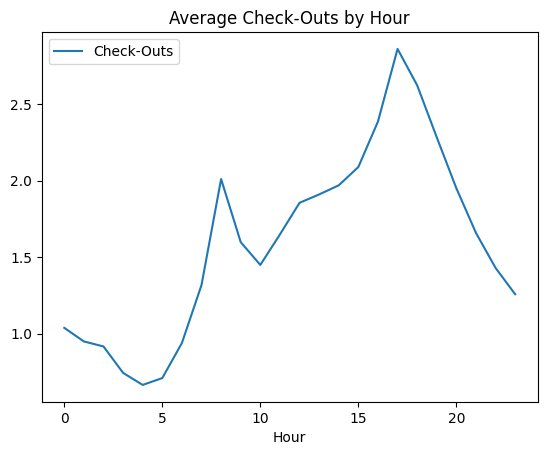

In [ ]:
df.groupby('Hour')['Check-Outs'].mean().plot(kind='line', title='Average Check-Outs by Hour', legend=True)

<Axes: title={'center': 'Average Check-Outs by Month'}, xlabel='Month'>

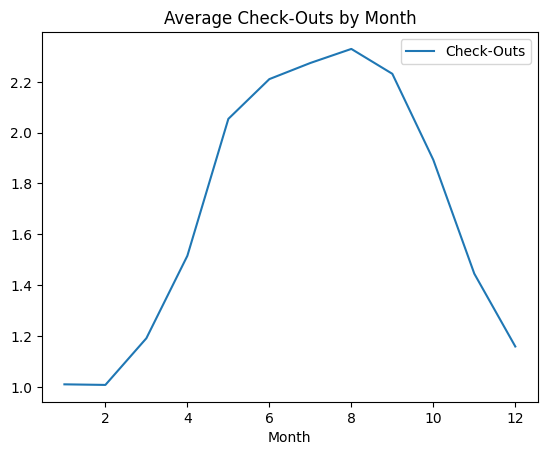

In [ ]:
df.groupby('Month')['Check-Outs'].mean().plot(kind='line', title='Average Check-Outs by Month', legend=True)

<Axes: title={'center': 'Average Check-Ins by Hour'}, xlabel='Hour'>

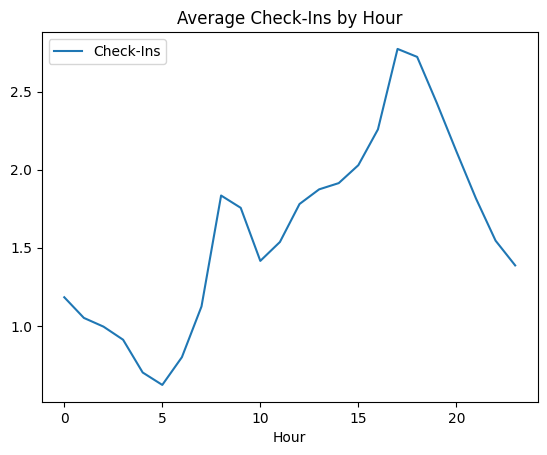

In [ ]:
df.groupby('Hour')['Check-Ins'].mean().plot(kind='line', title='Average Check-Ins by Hour', legend=True)

<Axes: title={'center': 'Average Check-Ins by Month'}, xlabel='Month'>

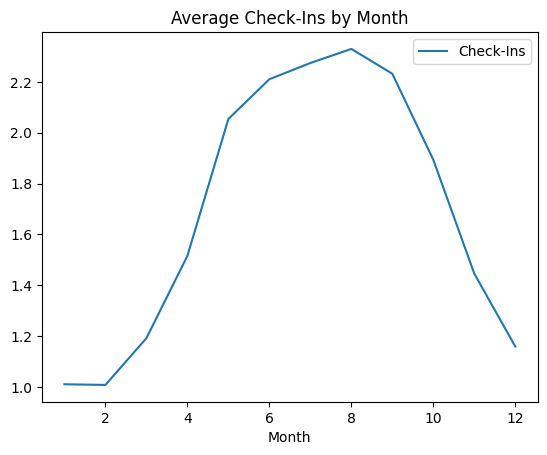

In [ ]:
df.groupby('Month')['Check-Ins'].mean().plot(kind='line', title='Average Check-Ins by Month', legend=True)

Shapes of the average check-outs/check-ins against hour and month curves are very similar.

<Axes: title={'center': 'Average Temperature by Month'}, xlabel='Month'>

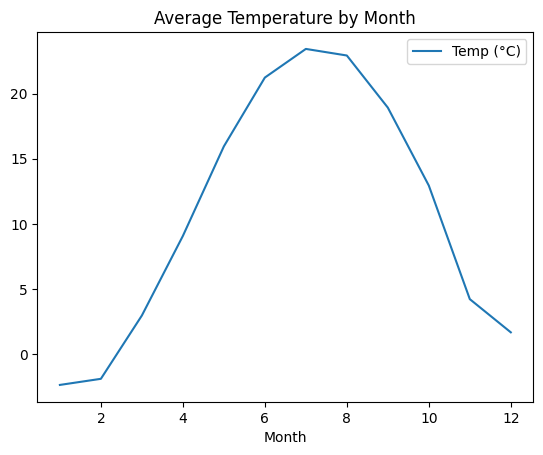

In [ ]:
df.groupby('Month')['Temp (°C)'].mean().plot(kind='line', title='Average Temperature by Month', legend=True)

<Axes: title={'center': 'Average Temperature by Day'}, xlabel='Day'>

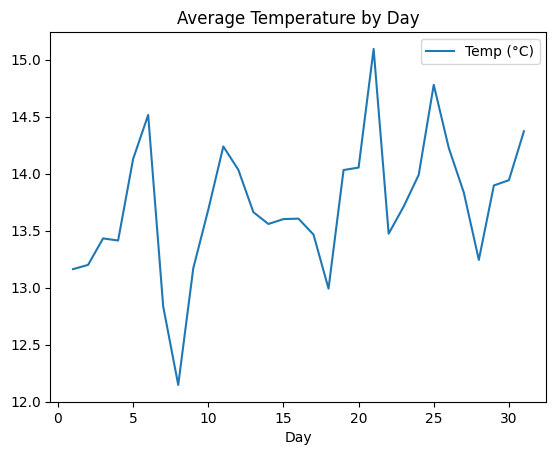

In [ ]:
df.groupby('Day')['Temp (°C)'].mean().plot(kind='line', title='Average Temperature by Day', legend=True)

<Axes: title={'center': 'Average Temperature by Hour'}, xlabel='Hour'>

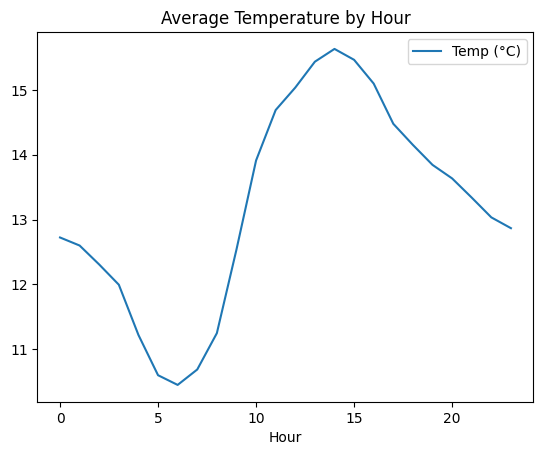

In [ ]:
df.groupby('Hour')['Temp (°C)'].mean().plot(kind='line', title='Average Temperature by Hour', legend=True)

# EDA on Partial Dataset

From the above EDA we can see that some "Station Id" does not have much data, e.g. "Station Id" 7511 only has one row of data. Hence we will scope our modelling to the top 15 "Station Id" that has the most datapoints

In [ ]:
# List of top 15 "Station Id" with most datapoints
list_of_stn = list(df["Station Id"].value_counts().head(15).index)

df_top_15 = df[df["Station Id"].isin(list_of_stn)]

In [ ]:
df_top_15.describe()

,Station Id,Check-Outs,Check-Ins,Year,Month,Day,Hour,Temp (°C),Dew Point Temp (°C),Rel Hum (%),...,Wind Spd (km/h),Visibility (km),Stn Press (kPa),Smoke,Rain-related,Snow-related,Clear/Cloudy,Obstructive,Freezing,Extreme
count,380785.00,380785.00,380785.00,380785.00,380785.00,380785.00,380785.00,380785.00,380785.00,380785.00,...,380785.00,380785.00,380785.00,380785.00,380785.00,380785.00,380785.00,380785.00,380785.00,380785.00
mean,7091.76,3.27,3.37,2021.37,6.77,15.70,13.01,11.73,5.25,67.07,...,16.44,22.34,99.52,0.00,0.08,0.04,0.84,0.06,0.00,0.00
std,98.66,3.65,3.88,1.46,3.22,8.78,6.32,10.28,9.65,18.16,...,8.88,4.84,0.73,0.05,0.28,0.19,0.36,0.23,0.05,0.07
min,7006.00,0.00,0.00,2019.00,1.00,1.00,0.00,-21.90,-30.10,16.00,...,1.00,0.00,95.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7030.00,1.00,1.00,2021.00,4.00,8.00,8.00,3.20,-1.90,54.00,...,10.00,24.10,99.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,7076.00,2.00,2.00,2022.00,7.00,16.00,13.00,12.70,5.90,67.00,...,15.00,24.10,99.52,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,7102.00,4.00,5.00,2023.00,9.00,23.00,18.00,20.40,13.20,80.00,...,21.00,24.10,100.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
max,7389.00,59.00,73.00,2023.00,12.00,31.00,23.00,34.70,26.00,100.00,...,67.00,80.50,102.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
df_top_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380785 entries, 125859 to 5722835
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Station Id           380785 non-null  int64  
 1   Check-Outs           380785 non-null  int64  
 2   Check-Ins            380785 non-null  int64  
 3   Year                 380785 non-null  int64  
 4   Month                380785 non-null  int64  
 5   Day                  380785 non-null  int64  
 6   Hour                 380785 non-null  int64  
 7   Temp (°C)            380785 non-null  float64
 8   Dew Point Temp (°C)  380785 non-null  float64
 9   Rel Hum (%)          380785 non-null  float64
 10  Wind Dir (10s deg)   380785 non-null  int64  
 11  Wind Spd (km/h)      380785 non-null  float64
 12  Visibility (km)      380785 non-null  float64
 13  Stn Press (kPa)      380785 non-null  float64
 14  Smoke                380785 non-null  int64  
 15  Rain-related    

<Axes: title={'center': 'Average Check-Outs by Hour of Top 15 Stations'}, xlabel='Hour'>

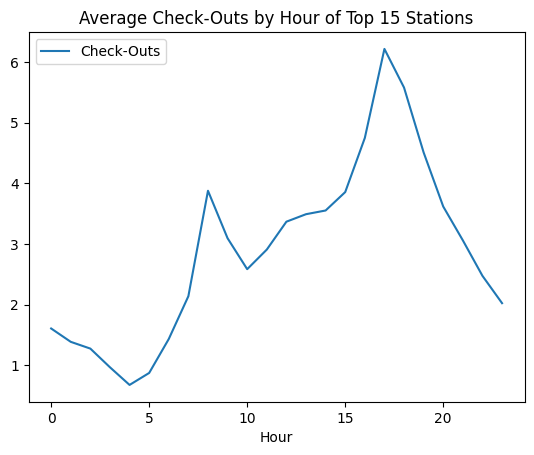

In [ ]:
df_top_15.groupby('Hour')['Check-Outs'].mean().plot(kind='line', title='Average Check-Outs by Hour of Top 15 Stations', legend=True)

<Axes: title={'center': 'Average Check-Outs by Month of Top 15 Stations'}, xlabel='Month'>

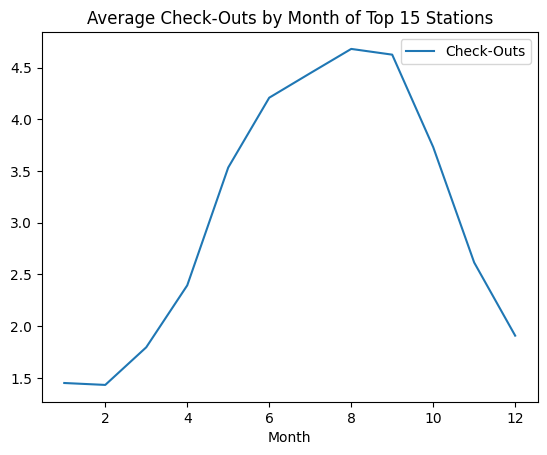

In [ ]:
df_top_15.groupby('Month')['Check-Outs'].mean().plot(kind='line', title='Average Check-Outs by Month of Top 15 Stations', legend=True)

<Axes: title={'center': 'Average Check-Ins by Hour of Top 15 Stations'}, xlabel='Hour'>

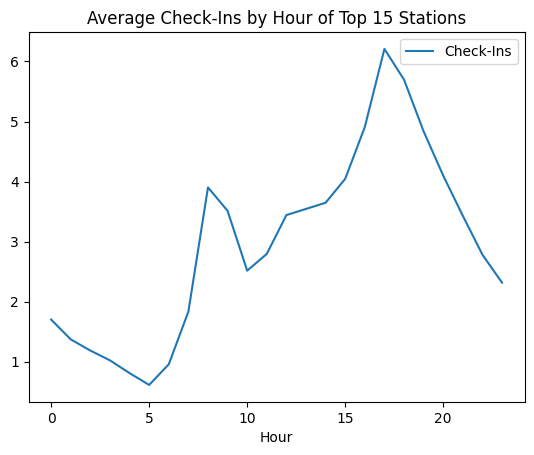

In [ ]:
df_top_15.groupby('Hour')['Check-Ins'].mean().plot(kind='line', title='Average Check-Ins by Hour of Top 15 Stations', legend=True)

<Axes: title={'center': 'Average Check-Ins by Month of Top 15 Stations'}, xlabel='Month'>

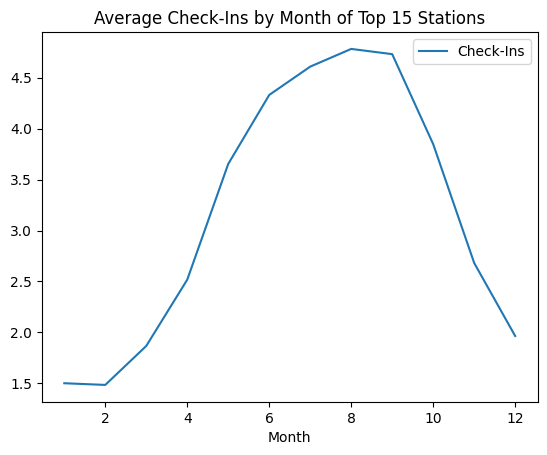

In [ ]:
df_top_15.groupby('Month')['Check-Ins'].mean().plot(kind='line', title='Average Check-Ins by Month of Top 15 Stations', legend=True)

The shape of the average check-outs/check-ins per month and hour are very similar between the full dataset and partial (top 15 stations) dataset. The peak values, however, are different, with the partial dataset having almost twice the value at the peaks.

Thus, when modelling, we should scale and normalise the data to ensure that the distribution is kept consistent.

<Axes: title={'center': 'Average Temperature by Month'}, xlabel='Month'>

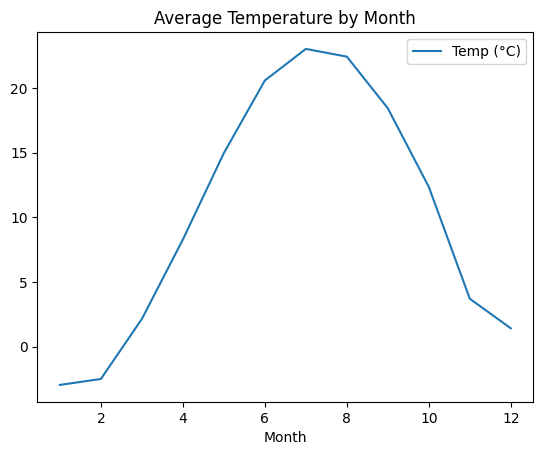

In [ ]:
df_top_15.groupby('Month')['Temp (°C)'].mean().plot(kind='line', title='Average Temperature by Month', legend=True)

<Axes: title={'center': 'Average Temperature by Day'}, xlabel='Day'>

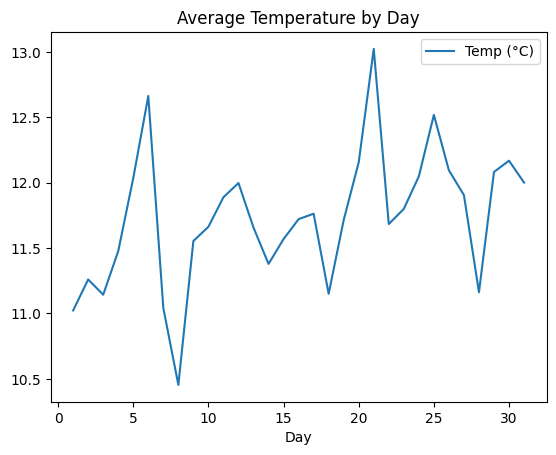

In [ ]:
df_top_15.groupby('Day')['Temp (°C)'].mean().plot(kind='line', title='Average Temperature by Day', legend=True)

<Axes: title={'center': 'Average Temperature by Hour'}, xlabel='Hour'>

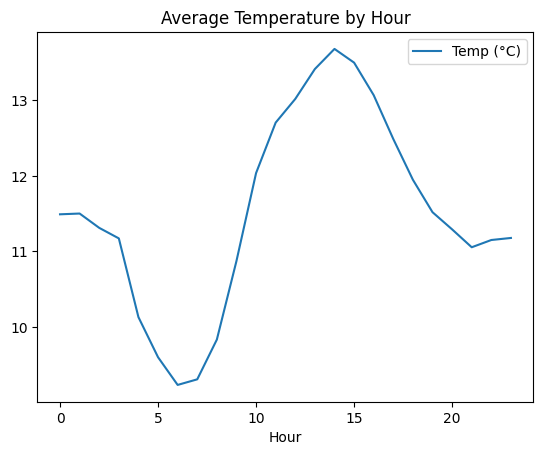

In [ ]:
df_top_15.groupby('Hour')['Temp (°C)'].mean().plot(kind='line', title='Average Temperature by Hour', legend=True)

# Feature Section

**Correlation Matrix**

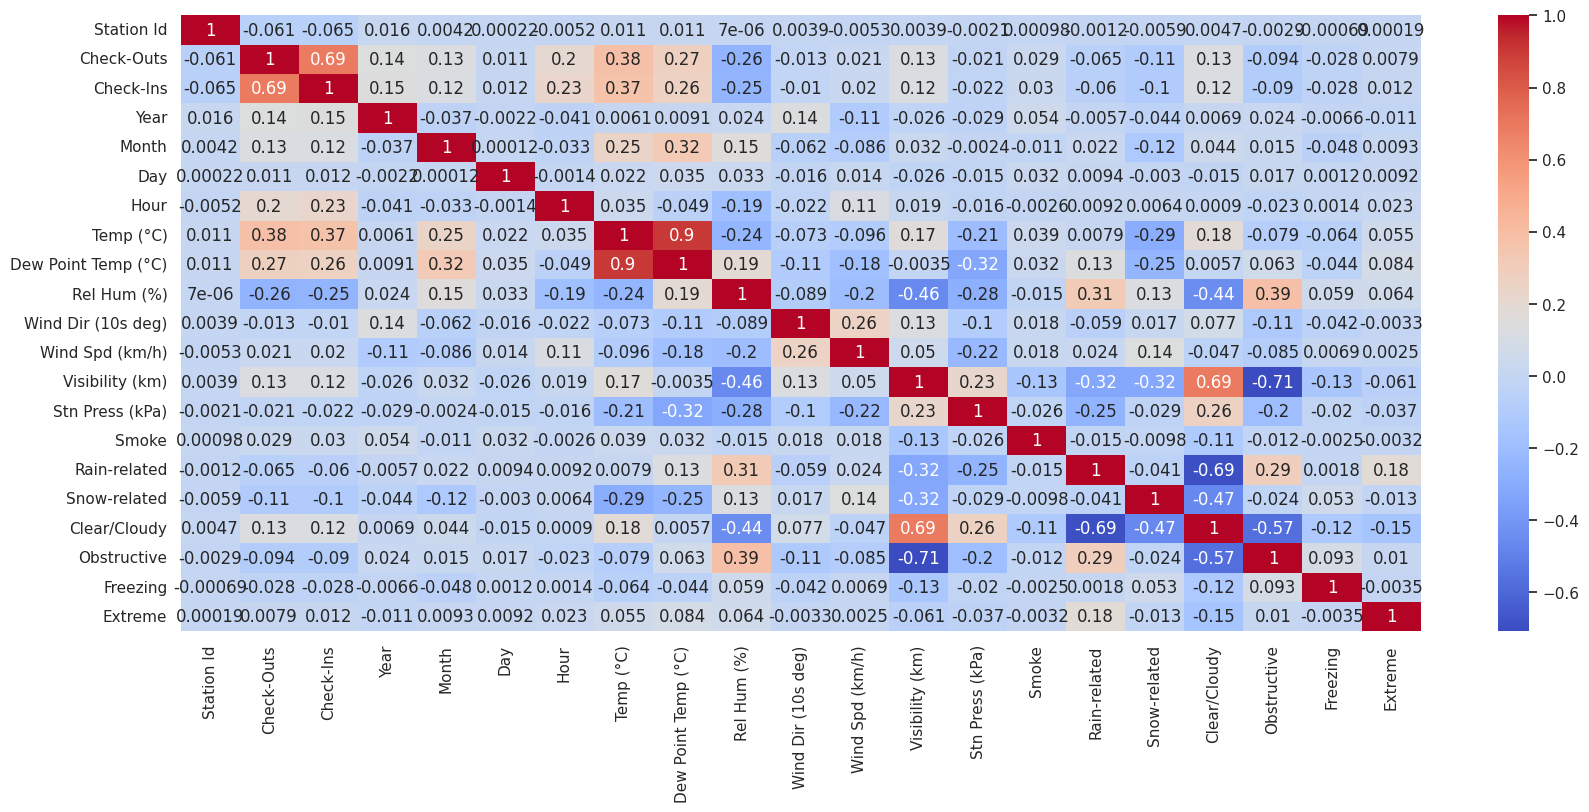

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_top_15.corr()
sns.set_theme(rc={'figure.figsize':(20,8)}) # https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Conclusion:
- Drop 'Dew Point Temp (°C)' due to high correlation with 'Temp (°C)'
- Drop 'Stn Press (kPa)' and 'Wind Dir (10s deg)' that has low correlation with target (check-outs and check-ins), as well as using domain knowledge (drop Wind Dir instead of Wind Spd)

**Variance Threshold**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.1
selector = VarianceThreshold(threshold=threshold)
selector.fit(df_top_15)

low_variance_features = [column for column, variance in zip(df_top_15.columns, selector.variances_) if variance < threshold]
print("Low variance features to consider dropping:", low_variance_features)

Low variance features to consider dropping: ['Smoke', 'Rain-related', 'Snow-related', 'Obstructive', 'Freezing', 'Extreme']


**Recursive Feature Elimination**

In [ ]:
target_variable = 'Check-Outs'
X = df_top_15.drop(columns=["Check-Outs", "Check-Ins"])
y = df_top_15[target_variable]

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

rfe_selector = RFE(estimator=model, n_features_to_select=5, step=1)
rfe_selector.fit(X, y)

rfe_selected_features = X.columns[rfe_selector.support_]
print("RFE selected features:", rfe_selected_features)

RFE selected features: Index(['Year', 'Smoke', 'Snow-related', 'Clear/Cloudy', 'Obstructive'], dtype='object')


In [ ]:
target_variable = 'Check-Ins'  # Replace with actual target variable if different
X = df_top_15.drop(columns=["Check-Outs", "Check-Ins"])
y = df_top_15[target_variable]

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()

rfe_selector = RFE(estimator=model, n_features_to_select=5, step=1)
rfe_selector.fit(X, y)

rfe_selected_features = X.columns[rfe_selector.support_]
print("RFE selected features:", rfe_selected_features)

RFE selected features: Index(['Year', 'Hour', 'Smoke', 'Rain-related', 'Obstructive'], dtype='object')


**Forward Selection**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    best_features = initial_features.copy()
    remaining_features = list(X.columns)

    while remaining_features:
        best_score = float('inf')
        best_feature = None
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit()
            score = model.aic
            if score < best_score:
                best_score = score
                best_feature = feature

        if best_feature:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features = initial_features.copy()
        else:
            break

    return best_features

In [ ]:
target_variable = 'Check-Outs'
X = df_top_15.drop(columns=["Check-Outs", "Check-Ins"])
y = df_top_15[target_variable]

In [ ]:
best_features_forward = forward_selection(X, y)
print("Selected features using Forward Selection:", best_features_forward)

Selected features using Forward Selection: ['Temp (°C)', 'Hour', 'Year', 'Rel Hum (%)', 'Month', 'Station Id', 'Snow-related', 'Wind Spd (km/h)', 'Wind Dir (10s deg)', 'Rain-related', 'Stn Press (kPa)', 'Day', 'Smoke', 'Freezing', 'Clear/Cloudy', 'Obstructive', 'Extreme', 'Visibility (km)', 'Dew Point Temp (°C)']


In [ ]:
target_variable = 'Check-Ins'
X = df_top_15.drop(columns=["Check-Outs", "Check-Ins"])
y = df_top_15[target_variable]

In [ ]:
best_features_forward = forward_selection(X, y)
print("Selected features using Forward Selection:", best_features_forward)

Selected features using Forward Selection: ['Temp (°C)', 'Hour', 'Year', 'Rel Hum (%)', 'Month', 'Station Id', 'Snow-related', 'Wind Spd (km/h)', 'Wind Dir (10s deg)', 'Rain-related', 'Dew Point Temp (°C)', 'Day', 'Stn Press (kPa)', 'Clear/Cloudy', 'Obstructive', 'Smoke', 'Freezing', 'Extreme', 'Visibility (km)']


**Backward Selection**

In [ ]:
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)

    while features:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        p_values = model.pvalues.iloc[1:]

        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break

    return features

In [ ]:
target_variable = 'Check-Outs'  # Replace with actual target variable if different
X = df_top_15.drop(columns=["Check-Outs", "Check-Ins"])
y = df_top_15[target_variable]

In [ ]:
best_features_backward = backward_elimination(X, y)
print("Selected features using Backward Elimination:", best_features_backward)

Selected features using Backward Elimination: ['Station Id', 'Year', 'Month', 'Day', 'Hour', 'Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)', 'Stn Press (kPa)', 'Rain-related', 'Clear/Cloudy', 'Obstructive']


In [ ]:
target_variable = 'Check-Ins'
X = df_top_15.drop(columns=["Check-Outs", "Check-Ins"])
y = df_top_15[target_variable]

In [ ]:
best_features_backward = backward_elimination(X, y)
print("Selected features using Backward Elimination:", best_features_backward)

Selected features using Backward Elimination: ['Station Id', 'Year', 'Month', 'Day', 'Hour', 'Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)', 'Wind Spd (km/h)', 'Stn Press (kPa)', 'Rain-related', 'Clear/Cloudy', 'Obstructive']
